In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
import time

### Let's take a look at the top teams in Serie A

In [2]:
#data cleaning
df = pd.read_csv("serieATopGoals.csv")
df = df.head(n=6)
df = df.drop(columns=['Unnamed: 0', 'YC', 'RC', 'F', 'OFF', 'HG', 'KG'])
df.rename(columns={'STANDARD':'Name', 'GP': 'Games', 'GF':'Goals', 'A':'Assists', 'SOG':'Shots on Goal', 'S':'Total Shots'}, inplace=True)
for i in range(6):
    if(df.at[i, 'Name'].split()[1] == df.at[i, 'Name'].split()[2]):
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1]
    else:
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1] + df.at[i, 'Name'].split()[2]
    df.at[i, 'Goals/Game'] = (df.at[i, 'Goals']/df.at[i, 'Games'])
print(df)

         Name  Games  Goals  Assists  Shots on Goal  Total Shots  Goals/Game
0    Juventus     27     59       32            161          459    2.185185
1    Atalanta     27     56       41            148          432    2.074074
2        Roma     27     51       34            171          429    1.888889
3      Napoli     27     48       33            167          487    1.777778
4   Sampdoria     27     44       31            128          322    1.629630
5  Fiorentina     27     42       20            132          414    1.555556


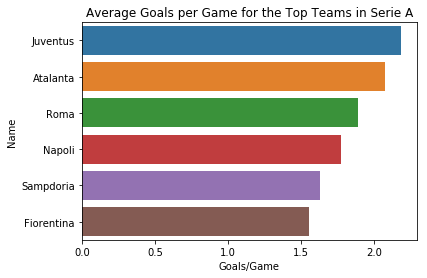

In [3]:
#visualization of top scorers per game
#df1 = df.sort_values(['Goals/Game'])
bar1 = sns.barplot(x='Goals/Game', y='Name', data=df)
#bar1.set_xticklabels(bar1.get_xticklabels(),rotation=90)
plt.title('Average Goals per Game for the Top Teams in Serie A')
plt.show()

In [4]:
#create 2 new columns for shooting accuracy and coversion rate
#shooting accuracy is given by (shots on goal/total shots)*100%
#conversion rate is given by (goals/shots on goal)*100%
for i in range(6):
    df.at[i, 'Shooting Accuracy(%)'] = (df.at[i, 'Shots on Goal']/df.at[i, 'Total Shots'])*100
    df.at[i, 'Conversion Rate(%)'] = (df.at[i, 'Goals']/df.at[i, 'Shots on Goal'])*100
print(df)

         Name  Games  Goals  Assists  Shots on Goal  Total Shots  Goals/Game  \
0    Juventus     27     59       32            161          459    2.185185   
1    Atalanta     27     56       41            148          432    2.074074   
2        Roma     27     51       34            171          429    1.888889   
3      Napoli     27     48       33            167          487    1.777778   
4   Sampdoria     27     44       31            128          322    1.629630   
5  Fiorentina     27     42       20            132          414    1.555556   

   Shooting Accuracy(%)  Conversion Rate(%)  
0             35.076253           36.645963  
1             34.259259           37.837838  
2             39.860140           29.824561  
3             34.291581           28.742515  
4             39.751553           34.375000  
5             31.884058           31.818182  


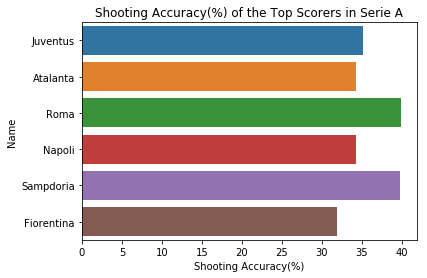

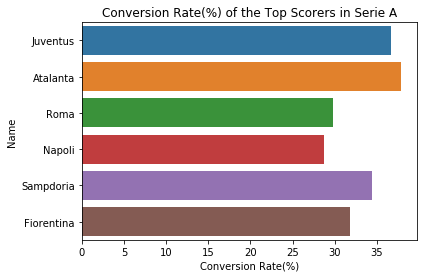

In [6]:
#visualization of top scorers' shooting accuracy and conversion rate
#df2 = df.sort_values(['Shooting Accuracy(%)'])
bar2 = sns.barplot(x='Shooting Accuracy(%)', y='Name', data=df)
plt.title('Shooting Accuracy(%) of the Top Scorers in Serie A')
plt.show()

#df3 = df.sort_values(['Conversion Rate(%)'])
bar3 = sns.barplot(x='Conversion Rate(%)', y='Name', data=df)
plt.title('Conversion Rate(%) of the Top Scorers in Serie A')
plt.show()